# Compsci 571 HW5
## Question 3 Ridge Regression

## 3b) MSE for $\beta_1$ and $\beta_2$ under different $\lambda$ values

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn import metrics

In [2]:
X = scipy.io.loadmat('X.mat')
X = X['X'] # take out the real useful matrix (I hate matlab!)

In [3]:
print('Shape of X is:', X.shape)

Shape of X is: (50, 20)


So the X matrix contains 50 observations, and each observation has 20 features.

In [67]:
def generate_y(X, beta):
    assert X.shape[1] == beta.shape[0]
    n = X.shape[0]
    p = X.shape[1]
    e = np.random.normal(0, 1.0, n)
    e = e.reshape(n, 1)
#     plt.hist(e)
#     plt.show()
    y = np.dot(X, beta) + e
    return y

In [68]:
beta1 = np.array([0.1, 0.3, 0.2, 0.2, 0.9, 0.8, 0.9, 0.1, 0.4, 0.2, 0.7, \
                 0.3, 0.1, 0.7, 0.8, 0.3, 0.2, 0.8, 0.1, 0.7]).reshape(20, 1)
beta2 = np.array([0.5, 0.6, 0.7, 0.9, 0.9, 0.8, 0.9, 0.8, 0.6, 0.5, 0.7, \
                 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.8, 0.5, 0.7]).reshape(20, 1)
print(beta1.shape)
print(beta2.shape)

(20, 1)
(20, 1)


In [69]:
def ridge_mse(X, beta, lambda_value, t = 100):
    mse = 0.0
    ridge = Ridge(alpha = lambda_value)
    for i in range(t):
        y = generate_y(X, beta)
        assert X.shape[0] == y.shape[0]
        assert y.shape[1] == 1
        ridge.fit(X, y)
        yhat = ridge.predict(X)
        mse = mse + metrics.mean_squared_error(y, yhat)
    mse = mse / t
    return mse

In [70]:
mse_beta1 = []
mse_beta2 = []
for l in np.arange(0.0, 10, 0.1): # loop over different lambda values
    mse1 = ridge_mse(X, beta1, l)
    mse2 = ridge_mse(X, beta2, l)
    mse_beta1.append(mse1)
    mse_beta2.append(mse2)

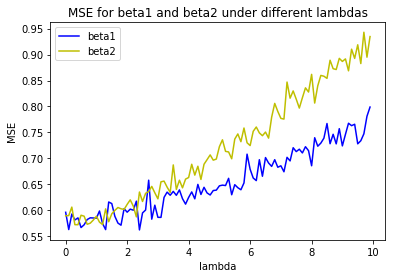

In [54]:
plt.plot(np.arange(0.0, 10, 0.1), mse_beta1, c = 'b', label = 'beta1')
plt.plot(np.arange(0.0, 10, 0.1), mse_beta2, c = 'y', label = 'beta2')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.title('MSE for beta1 and beta2 under different lambdas')
plt.show()

## 3c) singular value decomposition

Center and standardize X on rows such that $X^T X = corr{(X)}$.

In [5]:
from sklearn import preprocessing

In [54]:
X_trans = preprocessing.scale(X, axis = 1) # standardize each row/observation

In [141]:
print(X_trans.shape)
print(X_trans.mean(axis = 1)) # mean for each row
print(X_trans.std(axis = 1)) # standard deviation for each row
print(np.dot(X_trans.T, X_trans))

(50, 20)
[ 1.13797860e-16  4.44089210e-17  3.33066907e-17  0.00000000e+00
 -1.66533454e-16 -4.44089210e-17  5.55111512e-17 -4.71844785e-17
  2.22044605e-17  2.22044605e-17  4.16333634e-17 -1.11022302e-17
 -1.22124533e-16  0.00000000e+00  1.11022302e-17 -4.44089210e-17
 -4.71844785e-17 -1.11022302e-17 -5.55111512e-18 -5.55111512e-17
 -1.11022302e-17 -8.88178420e-17  1.66533454e-17 -8.32667268e-18
  6.93889390e-19  7.21644966e-17 -1.38777878e-17  8.88178420e-17
  4.44089210e-17  3.33066907e-17  1.38951350e-16 -2.22044605e-17
 -5.55111512e-17  1.38777878e-17 -1.11022302e-17 -3.81639165e-17
  1.11022302e-17  7.21644966e-17 -1.11022302e-17  0.00000000e+00
  2.22044605e-17  1.11022302e-17 -6.24541109e-17 -4.71844785e-17
  5.55111512e-18 -4.99600361e-17 -1.34614542e-16  3.33066907e-17
 -2.22044605e-17  2.22044605e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[[ 6.68139611e+01 -3.86

Singular value decomposition of X

In [139]:
# np.dot(np.dot(u, np.diag(s)), vh) = X_trans
u, s, vh = np.linalg.svd(X_trans, full_matrices=False)

In [140]:
print(u.shape)
print(s.shape)
print(s)
print(vh.shape)

(50, 20)
(20,)
[1.08685665e+01 1.01288602e+01 9.45271634e+00 9.22221284e+00
 8.53080035e+00 8.23097865e+00 7.92436428e+00 7.68104828e+00
 7.44810027e+00 6.87699177e+00 6.64541280e+00 6.22444475e+00
 5.79245037e+00 5.58982581e+00 5.15934816e+00 4.70025219e+00
 4.18104369e+00 3.89137936e+00 3.27925400e+00 2.00417943e-15]
(20, 20)


$\hat{\gamma}^{ridge} = \mathbf{V}^{T} \hat{\beta}^{ridge} = (\mathbf{L}^2 + \lambda \mathbf{I}_{p})^{-1} \mathbf{L} \mathbf{U}^{T}_{p} \mathbf{Y}.$

In [85]:
def predict_gamma(X, y, lambda_value):
    # u.shape = [50, 20]
    # s.shape = [20, ] just a vector, not the diagonal matrix
    # vh.shape = [20, 20]
    u, s, vh = np.linalg.svd(X_trans, full_matrices=False)
    gamma_hat = np.diag(s / (s ** 2 + lambda_value))
    gamma_hat = np.dot(gamma_hat, u.T)
    gamma_hat = np.dot(gamma_hat, y)
    return gamma_hat

In [135]:
def generate_y_intercept(X, alpha, beta):
    assert X.shape[1] == beta.shape[0]
    n = X.shape[0]
    p = X.shape[1]
    e = np.random.normal(0, 1.0, n)
    e = e.reshape(n, 1)
    y = alpha + np.dot(X, beta) + e
    return y

In [113]:
def ridge_svd(X, alpha, beta, lambda_value, t = 100):
#     mean_gamma_hat = np.zeros([20, 1])
    gamma_hats = np.empty([20, 0])
    for i in range(t):
        y = generate_y_intercept(X, alpha, beta)
        gamma_hat = predict_gamma(X, y, lambda_value)
#         mean_gamma_hat += gamma_hat
        gamma_hats = np.append(gamma_hats, gamma_hat, axis=1)
#     mean_gamma_hat /= t
#     return mean_gamma_hat
    return gamma_hats

In [116]:
# mean_gamma_hat = ridge_svd(X_trans, 0.1, beta1, 1)
gamma_hats = ridge_svd(X_trans, 0.1, beta1, 1)
mean_gamma_hat = np.mean(gamma_hats, axis=1)

$\gamma = \mathbf{V}^{T} \beta$

In [91]:
u, s, vh = np.linalg.svd(X_trans, full_matrices=False)
gamma = np.dot(vh, beta1)

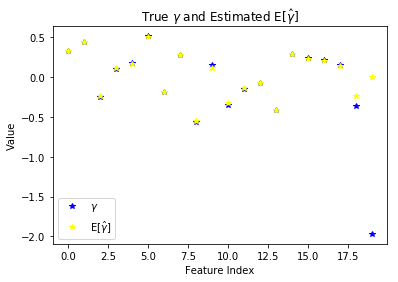

In [117]:
plt.plot(range(0, 20), gamma, '*', color='blue', label=r'$\gamma$')
plt.plot(range(0, 20), mean_gamma_hat, '*', color='yellow', label=r'E[$\hat{\gamma}$]')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.title(r'True $\gamma$ and Estimated E[$\hat{\gamma}$]')
plt.legend()
plt.show()

In [122]:
v1 = np.zeros([20, 1])
v2 = np.zeros([20, 1])
for i in range(20):
    v1[i, 0] = np.mean((gamma_hats[i, :] - gamma[i, 0]) ** 2)
    v2[i, 0] = (s[i] ** 2 + gamma[i, 0] ** 2) / (s[i] ** 2 + 1) ** 2

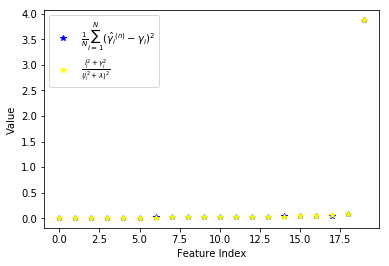

In [126]:
plt.plot(range(0, 20), v1, '*', color='blue', \
         label=r'$\frac{1}{N}\sum_{i=1}^{N}(\hat{\gamma_i}^{(n)} - \gamma_i)^2$')
plt.plot(range(0, 20), v2, '*', color='yellow', \
        label=r'$\frac{l_i^2 + \gamma_i^2}{(l_i^2 + \lambda)^2}$')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.show()